Colab🤩 -> https://drive.google.com/file/d/17Tj5ZISm-BNC51oAYADUsgWYhXedZX3A/view?usp=sharing 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display

In [3]:
# Данные для спектра неона
neon_data = {
    'Цвет линии (неон)': [
        'Ярко-красная', 'Красно-оранжевая', 'Оранжевая первая', 
        'Желтая', 'Светло-зеленая', 'Сине-зеленая'
    ],
    'Длина волны (нм)': [640.2, 614.3, 594.5, 585.2, 576.0, 486.1],
    'Деления барабана': [2636, 2546, 2512, 2398, 2136, 2112]
}

df_neon = pd.DataFrame(neon_data)

# Данные для спектра ртути
mercury_data = {
    'Цвет линии (ртуть)': [
        'Красная', 'Оранжевая', 'Желтая левая', 
        'Желтая правая', 'Зеленая', 'Синяя', 'Фиолетовая'
    ],
    'Длина волны (нм)': [690.7, 623.2, 579.0, 577.0, 446.1, 435.8, 404.7],
    'Деления барабана': [2612, 2458, 2382, 2368, 2082, 1576, 1102]
}

df_mercury = pd.DataFrame(mercury_data)

display(df_neon)
display(df_mercury)

,Цвет линии (неон),Длина волны (нм),Деления барабана
0,Ярко-красная,640.2,2636
1,Красно-оранжевая,614.3,2546
2,Оранжевая первая,594.5,2512
3,Желтая,585.2,2398
4,Светло-зеленая,576.0,2136
5,Сине-зеленая,486.1,2112


,Цвет линии (ртуть),Длина волны (нм),Деления барабана
0,Красная,690.7,2612
1,Оранжевая,623.2,2458
2,Желтая левая,579.0,2382
3,Желтая правая,577.0,2368
4,Зеленая,446.1,2082
5,Синяя,435.8,1576
6,Фиолетовая,404.7,1102


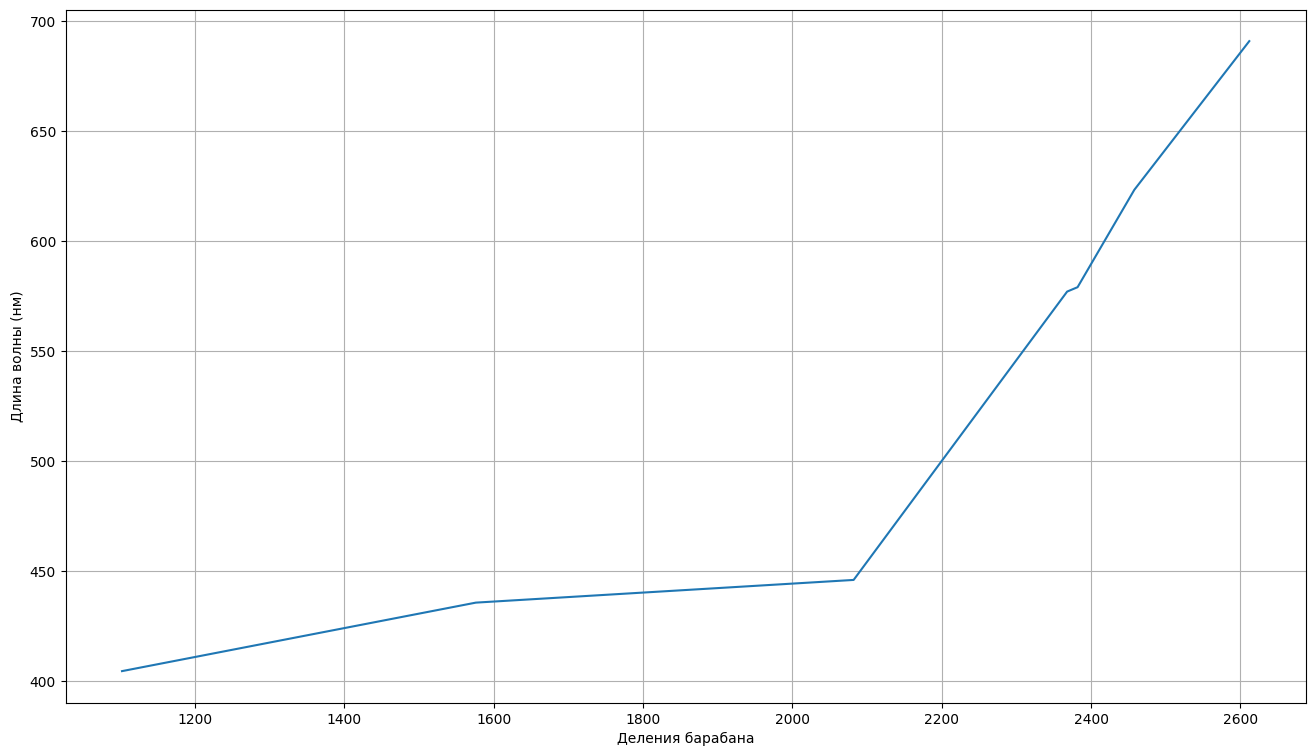

In [4]:
fig = plt.figure(figsize=(16, 9))
sns.lineplot(data=df_mercury, y="Длина волны (нм)", x="Деления барабана")
plt.grid()

# Осталось только сгладить!!!

In [12]:
Variance = []
for i in range(df_mercury.shape[0]):
	if i == df_mercury.shape[0]-1:
		break
	else:
		Variance.append(0.1 * ((df_mercury["Деления барабана"][i] - df_mercury["Деления барабана"][i+1])/360))

Variance = pd.DataFrame(Variance)
Variance["D_fi"] = Variance
Variance = Variance.drop([0],axis = 1)

Variance["D_l"] = Variance["D_fi"].apply(lambda x: 4.9 * x)
Variance = Variance.apply(lambda x: x)

Variance

,D_fi,D_l
0,0.042778,0.209611
1,0.021111,0.103444
2,0.003889,0.019056
3,0.079444,0.389278
4,0.140556,0.688722
5,0.131667,0.645167


In [5]:
tmp = pd.DataFrame(Variance)
tmp = pd.merge(tmp, df_neon, left_index = True, right_index=True)
tmp[["D_l", "Длина волны (нм)"]].T

,0,1,2,3,4,5
D_l,3.58,3.33,3.23,3.23,2.84,2.16
Длина волны (нм),640.20,614.30,594.50,585.20,576.00,486.10


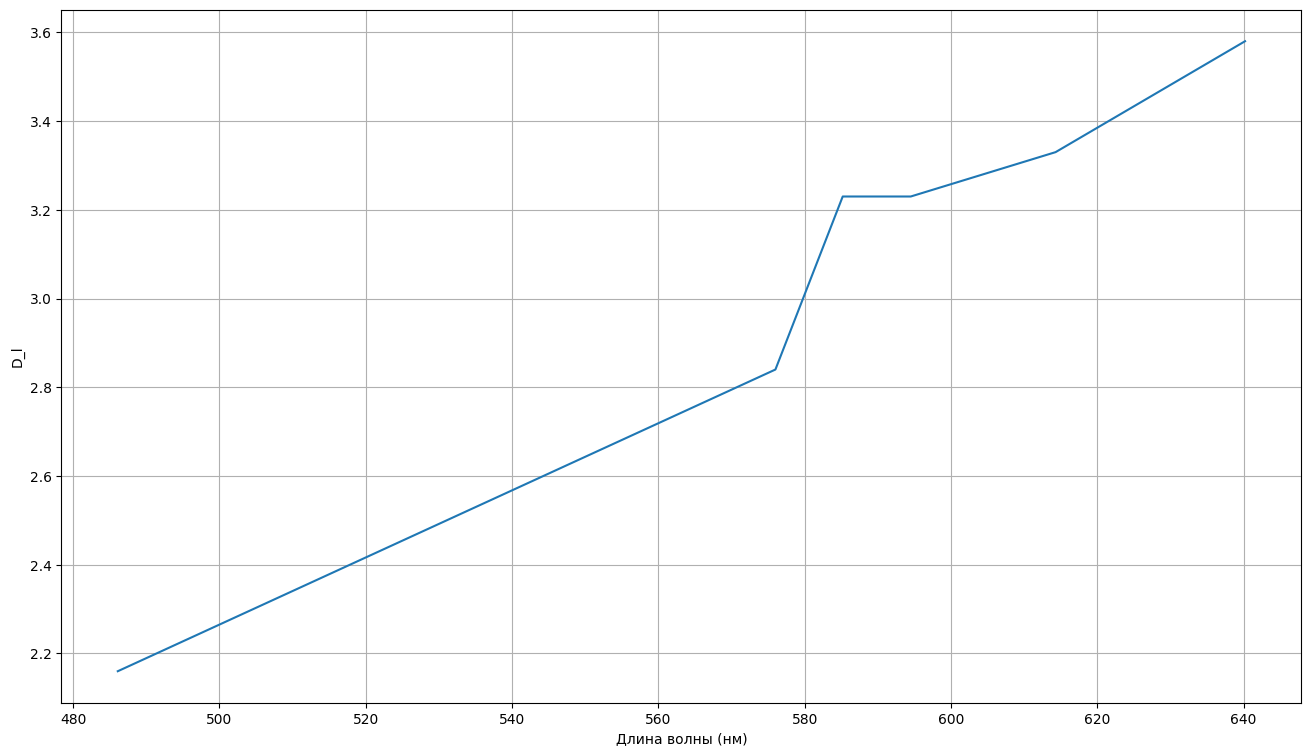

In [6]:
fig = plt.figure(figsize=(16, 9))

sns.lineplot(x="Длина волны (нм)", y="D_l", data=tmp)
plt.grid()